In [61]:
import cv2
import numpy as np
from matplotlib.pyplot import imshow
from scipy.cluster.vq import kmeans

In [26]:
def auto_canny(image, sigma=0.33):
	# compute the median of the single channel pixel intensities
	v = np.median(image)
	# apply automatic Canny edge detection using the computed median
	lower = int(max(0, (1.0 - sigma) * v))
	upper = int(min(255, (1.0 + sigma) * v))
	edged = cv2.Canny(image, lower, upper)
	# return the edged image
	return edged

200


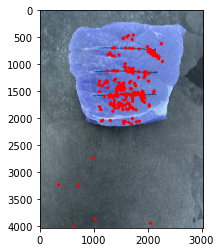

In [24]:
img = cv2.imread('aron.jpg')
# gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)

corners = cv2.goodFeaturesToTrack(gray, 200, 0.001, 20)
corners = np.int0(corners)
for corner in corners:
    x,y = corner.ravel()
    cv2.circle(img,(x,y),30,255,-1)
print(len(corners))
imshow(img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


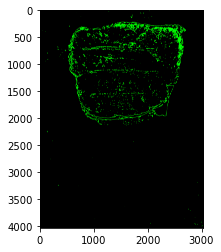

In [91]:
img = cv2.imread('aron.jpg')
arr = auto_canny(img)
imshow(arr)

# img_grey = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
#set a thresh


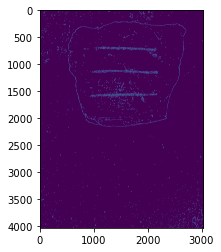

In [95]:
img = cv2.imread('aron.jpg')
# grayscaled = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
retval, threshold = cv2.threshold(auto_canny(img), 200, 255, cv2.THRESH_BINARY)
#find contours
# contours, hierarchy = cv2.findContours(threshold, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
# #create an empty image for contours
# img_contours = np.zeros(img.shape)
# # draw the contours on the empty image
# cv2.drawContours(img_contours, contours, -1, (0,255,0), 3)
# imshow(img_contours)

imshow(threshold)

In [85]:
inds = np.nonzero(np.sum(threshold,axis=1))
threshold = threshold[np.min(inds)+3:np.max(inds)-3]
inds = np.vstack((inds[0],inds[1])).transpose()
inds.shape

(89242, 2)

In [52]:
means = []
for i in range(threshold.shape[0]):
    means.append(threshold[i].mean())

In [53]:
max_mean_row = np.array(means).argmax()
max_mean_row

1572

In [65]:
sorted_rows = np.array(means).argsort()
threshold = 1.52*np.mean(means)
sorted_rows

array([2975, 2761, 2280, ..., 1576, 1140, 1572], dtype=int64)

In [60]:
final_rows = sorted_rows[-20]
lines = []
# for rows in final
delta = final_rows[2:]-final_rows[:-1]
line_loc =[]
row=0
for i in range(len(delta)):
    if delta<10:
        row = row+final_rows[i]
    else:
        line_loc.append()
        row=0
        

4032

In [88]:
# final_rows = sorted_rows.astype(float)
lines,_ = kmeans(inds.astype(np.float),3)
lines

array([[1591.54507056, 1538.50434386],
       [ 578.70852783, 1335.59419509],
       [3688.8265508 , 2108.35749611]])

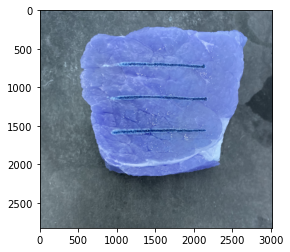

In [80]:
imshow(img[0:int(lines[4])][:])

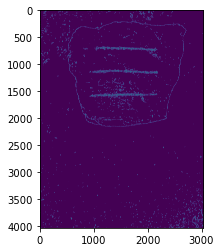

In [99]:
edges = cv2.Canny(img, 50, 150)
imshow(edges)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1


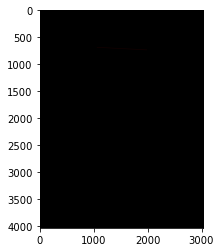

In [101]:
lines = cv2.HoughLinesP(edges,1,np.pi/180,40,minLineLength=30,maxLineGap=30)
i = 0
result = np.zeros(img.shape)
for x1,y1,x2,y2 in lines[0]:
    i+=1
    cv2.line(result,(x1,y1),(x2,y2),(255,0,0),1)
print(i)

imshow(result)